# 파이썬 기반의 AI를 위한 기초수학, 확률및통계

In [1]:
## 강봉주 
## bonjour.kang@gmail.com
##
## 데이터 기술
##

In [1]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 53.7 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 52.9 MB/s eta 0:00:00
Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 필요한 패키지
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

pd.__version__

'2.0.3'

## [BANK] 데이터

In [4]:
# 경로 정의
url = 'https://github.com/bong-ju-kang/kmu-mba-statistics-winter/raw/master/data/bank.zip'

# 데이터 읽기
df = pd.read_csv(url)
df.shape

(4521, 17)

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
df.info()   # 데이터 정보, 타입, 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [14]:
tmp = df[['age', 'day', 'pdays']]   # 두개 이상 묶을 때는 []를 두번 써야 한다
tmp.describe()

,age,day,pdays
count,4521.000000,4521.000000,4521.000000
mean,41.170095,15.915284,39.766645
std,10.576211,8.247667,100.121124
min,19.000000,1.000000,-1.000000
25%,33.000000,9.000000,-1.000000
50%,39.000000,16.000000,-1.000000
75%,49.000000,21.000000,-1.000000
max,87.000000,31.000000,871.000000


## 범주형 자료의 기술

In [4]:
# 빈도 보기
df['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [18]:
fieldList = ['job', 'marital', 'education']
for field in fieldList:
    print(f'\n--> {field} 필드의 그룹별 count수 출력')
    tmp = df[field].value_counts()
    print(tmp)


--> job 필드의 그룹별 count수 출력
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

--> marital 필드의 그룹별 count수 출력
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

--> education 필드의 그룹별 count수 출력
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64


In [5]:
# 빈도 비율 보기
cnt = df['marital'].value_counts()
np.round(cnt / cnt.sum(), 3)

married     0.619
single      0.265
divorced    0.117
Name: marital, dtype: float64

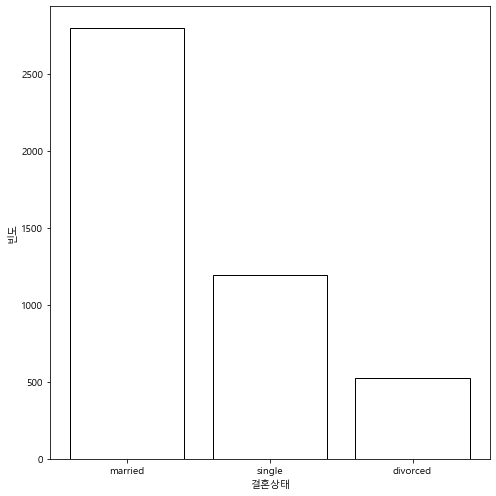

In [6]:
# 그래프 표현
fig, ax = plt.subplots(figsize=(7, 7))
ax.bar(df['marital'].value_counts().index, df['marital'].value_counts(), color='white', edgecolor='black')
ax.set_xlabel('결혼상태')
ax.set_ylabel('빈도')

plt.tight_layout()

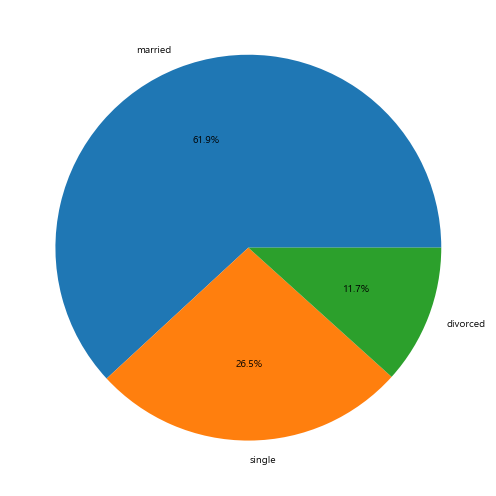

In [7]:
# 원 도표
fig, ax = plt.subplots(figsize=(7, 7))

# 앞의 %는 포맷을 표시하기 위한 것이며 뒤의 %%는 % 표시하기 위하여 %%가 된 것임
ax.pie(df['marital'].value_counts(), labels=df['marital'].value_counts().index, autopct='%1.1f%%')

plt.tight_layout()

## 연속형 자료의 기술

In [8]:
# 갖을 수 있는  모든 값에 대한 빈도
df['age'].value_counts(sort=False)

20      3
24     24
28    103
32    224
36    188
     ... 
71      6
75      6
79      4
83      4
87      1
Name: age, Length: 67, dtype: int64

In [9]:
# 값들의 그룹화
df['age'].value_counts(bins=10, sort=False)

(18.930999999999997, 25.8]     111
(25.8, 32.6]                   944
(32.6, 39.4]                  1235
(39.4, 46.2]                   869
(46.2, 53.0]                   706
(53.0, 59.8]                   482
(59.8, 66.6]                   100
(66.6, 73.4]                    36
(73.4, 80.2]                    30
(80.2, 87.0]                     8
Name: age, dtype: int64

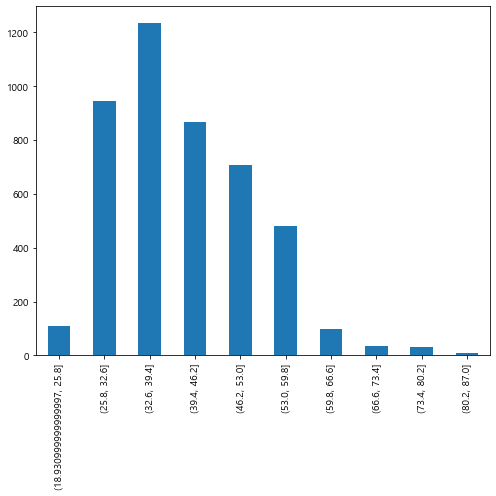

In [10]:
# 값들의 그룹화 도표
fig, ax = plt.subplots(figsize=(7, 7))
ax = df['age'].value_counts(bins=10, sort=False).plot.bar()
plt.tight_layout()

In [11]:
# 요약 통계량 기반의 분포 모습 확인
df['age'].describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

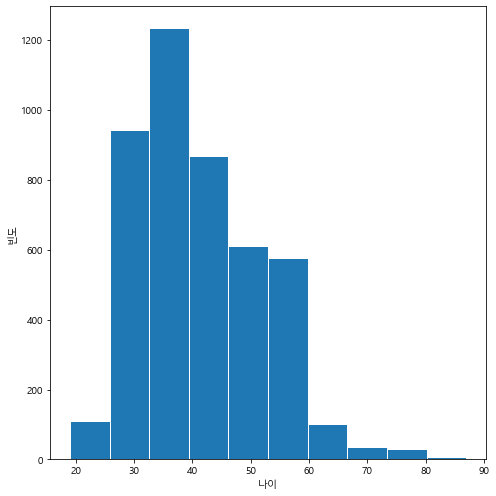

In [12]:
# 히스토그램: 연속형 변수의 분포 확인
fig, ax = plt.subplots(figsize=(7, 7))

ax.hist(df['age'], bins=10, edgecolor='white')
ax.set_xlabel('나이')
ax.set_ylabel('빈도')

plt.tight_layout()

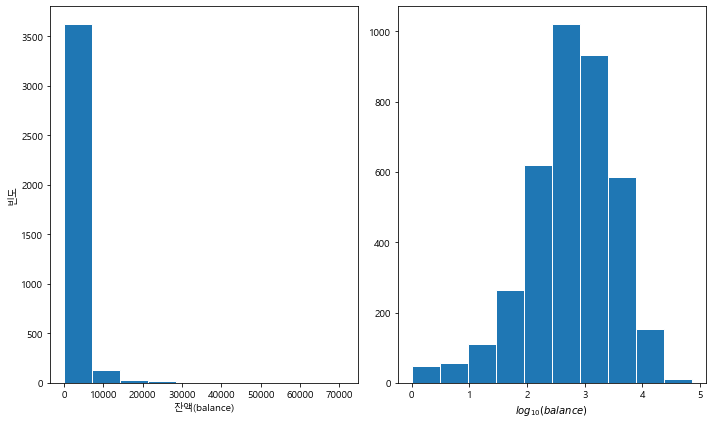

In [13]:
# 데이터 구성
x = df.loc[df['balance']> 0, 'balance']
logx = np.log10(x)

# 그래프 표현
fig, ax = plt.subplots(figsize=(10, 6), ncols=2)

ax[0].hist(x, bins=10, edgecolor='white')
ax[0].set_xlabel('잔액(balance)')
ax[0].set_ylabel('빈도')

ax[1].hist(logx, bins=10, edgecolor='white')
ax[1].set_xlabel(r'$log_{10}(balance)$' )

plt.tight_layout()

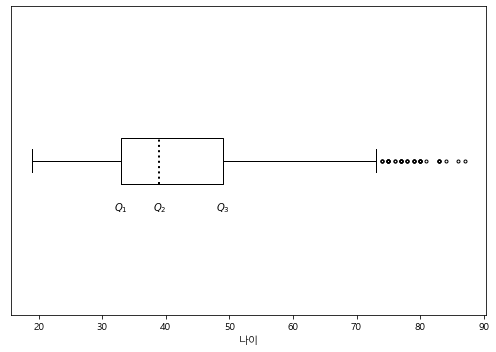

In [14]:
# 상자 그림
q1 = df['age'].describe()['25%']
median = df['age'].describe()['50%']
q3 = df['age'].describe()['75%']

fig, ax = plt.subplots(figsize=(7, 5))
ax.boxplot(df['age'], vert=False, sym='.', showmeans=False,
           medianprops={'lw':2,  'color':'k', 'ls':':'})

ax.annotate(r'$Q_1$', np.array([q1, 0.85]), va='center', ha='center')
ax.annotate(r'$Q_2$', np.array([median, 0.85]), va='center', ha='center')
ax.annotate(r'$Q_3$', np.array([q3, 0.85]), va='center', ha='center')

ax.set_xlabel('나이')
ax.set_yticks([])

plt.tight_layout()

In [15]:
# 표본 분산의 계산
# 분모는 데이터의 개수 - ddof 이므로
sample_variance = np.var(df['age'], ddof=1)

# 표준 편차
np.sqrt(sample_variance).round(3)

10.576